In [1]:
import numpy as np

from social_dilemmas.envs.pettingzoo_env import MAX_CYCLES
from social_dilemmas.envs.pettingzoo_env import env as aec_env
from social_dilemmas.envs.pettingzoo_env import parallel_env
from pettingzoo.test import api_test, parallel_api_test

In [2]:
env = aec_env(env = "harvest", num_agents = 10, proportion=0.7)
env.reset()
n_act = env.action_space(env.agents[0]).n

In [3]:
def show_state(env, img, cummulative_reward, step=0, info=""):
    img.set_data(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s | Reward: %r" % (env.metadata['name'],step, info, cummulative_reward))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

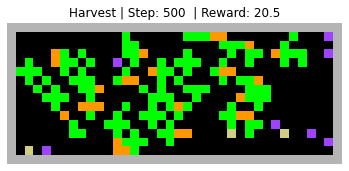

In [4]:
import matplotlib.pyplot as plt

from IPython import display
from random import randint

img = plt.imshow(env.render(mode='rgb_array'))
counter = 0
cummulative_reward = 0
for agent in env.agent_iter(500):
    counter += 1
    obs, reward, done, info = env.last()        
    cummulative_reward += reward
    action = randint(0,n_act-1) if not done else None
    env.step(action)
    show_state(env, img, cummulative_reward, counter)

In [ ]:
obs

In [ ]:
for agent in env.agent_iter(MAX_CYCLES * env.num_agents):
    env.last()
    action = np.random.randint(n_act)
    env.step(action)
    if not env.agents:
        env.reset()
api_test(env, MAX_CYCLES)

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)
env.reset()
n_act = env.action_space("agent-0").n
for _ in range(MAX_CYCLES * env.num_agents):
    actions = {agent: np.random.randint(n_act) for agent in env.agents}
    _, _, _, _ = env.step(actions)
    if not env.agents:
        _ = env.reset()
parallel_api_test(env, MAX_CYCLES)

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)

In [ ]:
from stable_baselines3.ppo import CnnPolicy
from stable_baselines3 import PPO
import supersuit as ss

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)

# env = ss.color_reduction_v0(env, mode="B")
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 3)
env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class="stable_baselines3")

model = PPO(
    CnnPolicy,
    env,
    verbose=3,
    n_steps=256)

In [ ]:
model.learn(total_timesteps=1000)